In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("winedata.csv")
df.drop(labels=['Unnamed: 0', 'region_1', 'region_2'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude


In [3]:
# Find 6 most popular wines to be reviewed
df['variety'].value_counts()[:6]

Pinot Noir            6299
Chardonnay            5600
Red Blend             5293
Cabernet Sauvignon    4851
Riesling              2740
Syrah                 2482
Name: variety, dtype: int64

In [4]:
# Subset dataset
df = df.loc[(df['variety'] == 'Pinot Noir') | (df['variety'] =='Chardonnay') | (df['variety'] == 'Red Blend') |
       (df['variety'] == 'Cabernet Sauvignon') | (df['variety'] == 'Riesling' )| (df['variety'] == 'Syrah'), :]

In [6]:
# Find a stratified subset on the basis of wine varieties
X = df[['country', 'description', 'price', 'points','province']]
y = df['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.97, random_state=100, stratify=y)

In [7]:
y_train.value_counts()

Pinot Noir            189
Chardonnay            168
Red Blend             159
Cabernet Sauvignon    145
Riesling               82
Syrah                  74
Name: variety, dtype: int64

In [8]:
# Find most popular countries
X_train['country'].value_counts()[:11]

US              477
France           70
Italy            69
Chile            48
Germany          37
Spain            27
Argentina        19
New Zealand      14
Australia        11
Austria          11
South Africa     10
Name: country, dtype: int64

In [9]:
# Subset dataframe to only those rows with 11 most popular contries
df = pd.concat([X_train, y_train], axis=1)
conditions = df['country'].apply(lambda x: x in X_train['country'].value_counts()[:11])
df = df.loc[conditions]

In [10]:
# Most popular wines in most popular countries
df.head()

,country,description,price,points,province,variety
147013,US,"Jammy and thick, and in the prime of its youth...",30.0,87,California,Syrah
42070,US,"Very tart, almost sour in acidity, with unnatu...",30.0,82,California,Chardonnay
68507,US,"A very nice buy at this price. Dry and jammy, ...",10.0,85,California,Syrah
105212,Argentina,"Quite spicy, with the Syrah element offering a...",38.0,91,Mendoza Province,Red Blend
30504,Italy,"Made in a restrained style, this has savory bl...",20.0,88,Veneto,Red Blend


In [11]:
# Reset index
df = df.reset_index(drop=True)
df.shape

(793, 6)

In [12]:
df.head()

,country,description,price,points,province,variety
0,US,"Jammy and thick, and in the prime of its youth...",30.0,87,California,Syrah
1,US,"Very tart, almost sour in acidity, with unnatu...",30.0,82,California,Chardonnay
2,US,"A very nice buy at this price. Dry and jammy, ...",10.0,85,California,Syrah
3,Argentina,"Quite spicy, with the Syrah element offering a...",38.0,91,Mendoza Province,Red Blend
4,Italy,"Made in a restrained style, this has savory bl...",20.0,88,Veneto,Red Blend


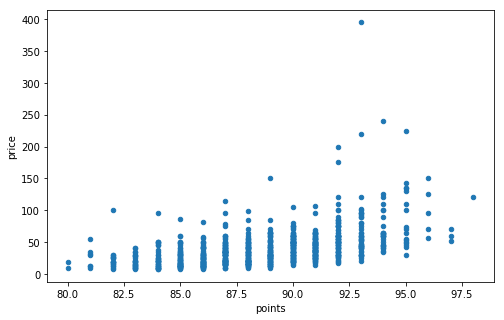

In [15]:
# Scatter plot between points and price of wine
df.plot(kind='scatter', x='points', y='price', figsize=(8,5))

In [16]:
# Write dataframe to csv file 
# df.to_csv("points_price.csv")

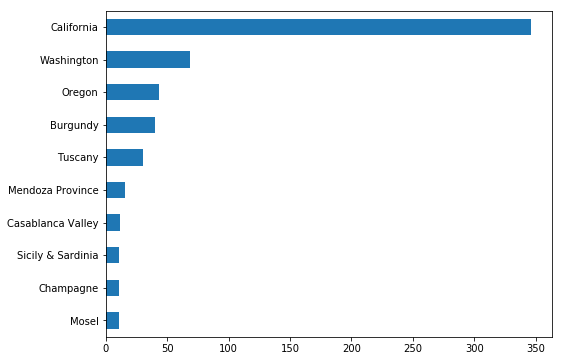

In [28]:
# Frequent provinces
df.province.value_counts()[df.province.value_counts()>10].sort_values().plot(kind='barh', figsize=(8,6))

In [26]:
# Mean price for each variety
# df.groupby(by="variety").price.mean().to_csv("variety_prices.csv")

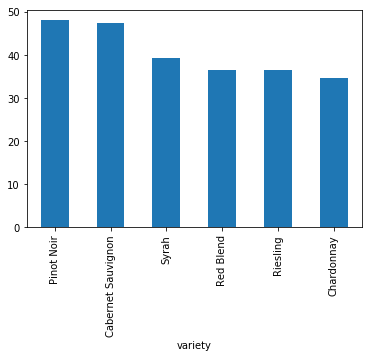

In [27]:
df.groupby(by="variety").price.mean().sort_values(ascending=False).plot(kind='bar')